In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [28]:
dataset = pd.read_csv("D:/PENS/Semester 4/Data Mining/Titanicc.csv")
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
test_dataset =  pd.read_csv("D:/PENS/Semester 4/Data Mining/titanic_test.csv")
test_dataset

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [30]:
train_data = dataset.loc[:,["Sex","Age","Pclass","Fare"]]
print(train_data)

# Lakukan pengisian missing value pada fitur Age dengan nilai mean dari masing-masing class
avg_age_class = train_data.groupby('Pclass')['Age'].mean()

for pclass, mean_age in avg_age_class.items():
    train_data.loc[(train_data['Pclass'] == pclass) & (train_data['Age'].isnull()), 'Age'] = mean_age

train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

# Ubah fitur kategorikal 'Sex' menjadi numerikal
train_data.loc[:, 'Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
train_data


        Sex   Age  Pclass     Fare
0      male  22.0       3   7.2500
1    female  38.0       1  71.2833
2    female  26.0       3   7.9250
3    female  35.0       1  53.1000
4      male  35.0       3   8.0500
..      ...   ...     ...      ...
886    male  27.0       2  13.0000
887  female  19.0       1  30.0000
888  female   NaN       3  23.4500
889    male  26.0       1  30.0000
890    male  32.0       3   7.7500

[891 rows x 4 columns]


,Sex,Age,Pclass,Fare
0,0,22.00000,3,7.2500
1,1,38.00000,1,71.2833
2,1,26.00000,3,7.9250
3,1,35.00000,1,53.1000
4,0,35.00000,3,8.0500
...,...,...,...,...
886,0,27.00000,2,13.0000
887,1,19.00000,1,30.0000
888,1,25.14062,3,23.4500
889,0,26.00000,1,30.0000


In [31]:
test_data = test_dataset.loc[:,["Sex","Age","Pclass","Fare"]]
test_data

# Ubah fitur kategorikal 'Sex' menjadi numerikal
test_data.loc[:, 'Sex'] = test_data['Sex'].replace({'male': 0, 'female': 1})
test_data

,Sex,Age,Pclass,Fare
0,0,34.5,3,7.8292
1,1,47.0,3,7.0000
2,0,62.0,2,9.6875
3,0,27.0,3,8.6625
4,1,22.0,3,12.2875
...,...,...,...,...
413,0,NaN,3,8.0500
414,1,39.0,1,108.9000
415,0,38.5,3,7.2500
416,0,NaN,3,8.0500


In [32]:
train_label = dataset.loc[:,["Survived"]]
train_label

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [33]:
test_label = pd.read_csv("D:/PENS/Semester 4/Data Mining/titanic_testlabel.csv")
test_label

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [34]:
dtc=DecisionTreeClassifier()
dtc.fit(train_data, train_label)
class_result = dtc.predict(test_data)
print("Class = ", class_result)

acc = dtc.score(train_data, train_label)
print("Accuracy: ", acc)
err = round((1-acc)*100, 2)
print("Error ratio: ", err, "%")

Class =  [0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]
Accuracy:  0.9797979797979798
Error ratio:  2.02 %


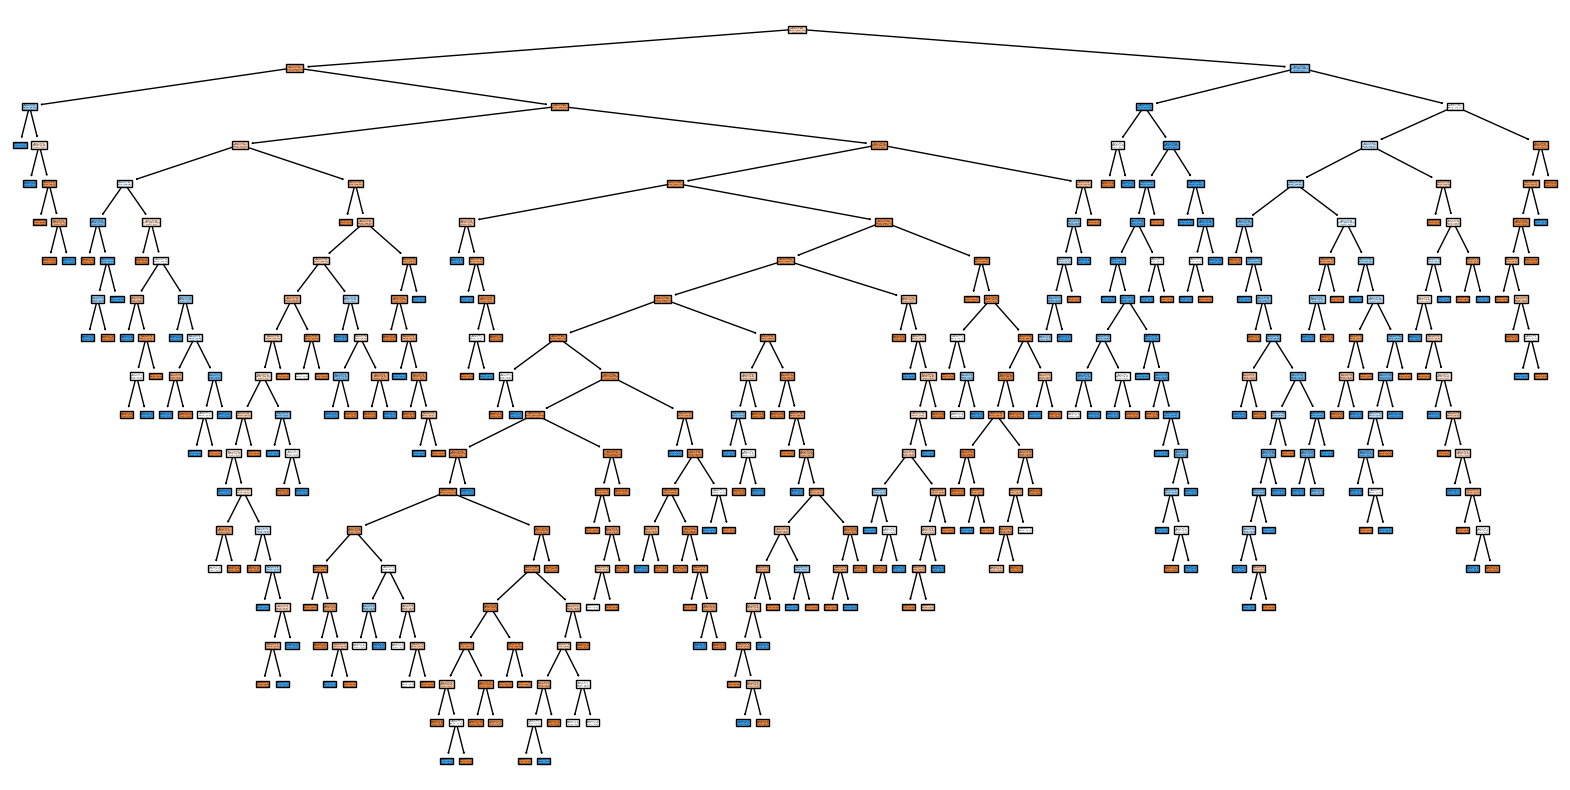

In [35]:
# Menampilkan visualisasi pohon
plt.figure(figsize=(20,10)) 
plot_tree(dtc, filled=True, feature_names=train_data.columns, class_names=True)  
plt.show()

[Text(0.5077431832107843, 0.975, 'x[0] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.18352558210784314, 0.925, 'x[1] <= 6.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.012549019607843137, 0.875, 'x[2] <= 2.5\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.006274509803921568, 0.825, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.018823529411764704, 0.825, 'x[3] <= 20.825\ngini = 0.49\nsamples = 14\nvalue = [8, 6]'),
 Text(0.012549019607843137, 0.775, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.025098039215686273, 0.775, 'x[1] <= 2.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.018823529411764704, 0.725, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.03137254901960784, 0.725, 'x[3] <= 31.331\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.025098039215686273, 0.675, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.03764705882352941, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3545021446078431

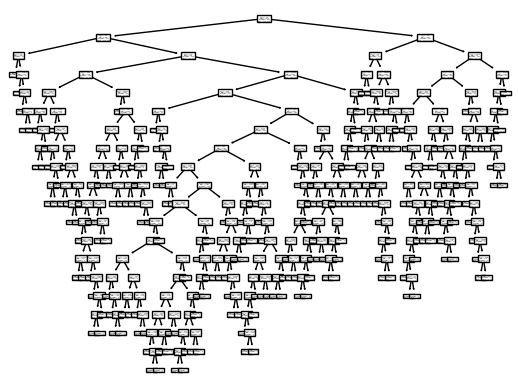

In [37]:
plot_tree(dtc)